# Component 3
----
#### First Edit : 04/15/2017

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randrange
import re
import time
from datetime import datetime
import ipywidgets

## Read in Sample Data

In [3]:
dt = pd.read_csv("sample_flat.csv")

In [4]:
dt.keys().tolist()

['names',
 'dates',
 'latitude',
 'longitude',
 'categorical',
 'quant1',
 'quant2',
 'quant3']

#### A function to recognize categorical and quantitative variables

In [5]:
def how_many(data, find_quant = True, return_n = False):
    varlist = data.keys().tolist()
    if find_quant:
        match = 'quant'
    else:
        match = 'cat'
    rx = re.compile(r'^{}'.format(match))
    var_match = [var for var in varlist if re.match(rx, var)]
    if return_n:
        result = len(var_match)
    else:
        result = var_match
    return result

In [6]:
print('Variables in the sample dataset: ')
print('='*75)

n_cat = how_many(data = dt, find_quant = False, return_n = True)
print('Total Number of Categorical Variables:  {}'.format(n_cat))
print('-'*75)
cats = how_many(data = dt, find_quant = False)
print('Categorical Variables:                  {}'.format(cats))
print('-'*75)

n_quan = how_many(data = dt, return_n = True)
print('Total Number of Quantitativ Variables:  {}'.format(n_quan))
print('-'*75)
quans = how_many(data = dt)
print('Quantitative Variables:                 {}'.format(quans))
print('-'*75)

Variables in the sample dataset: 
Total Number of Categorical Variables:  1
---------------------------------------------------------------------------
Categorical Variables:                  ['categorical']
---------------------------------------------------------------------------
Total Number of Quantitativ Variables:  3
---------------------------------------------------------------------------
Quantitative Variables:                 ['quant1', 'quant2', 'quant3']
---------------------------------------------------------------------------


In [7]:
# try to index quantitative variables
for quan in quans:
    print(dt[quan][:3])

0    1.933239
1    1.520733
2    1.863466
Name: quant1, dtype: float64
0     6.052785
1   -11.065076
2    11.437340
Name: quant2, dtype: float64
0    6105.123120
1     143.902725
2    2019.370225
Name: quant3, dtype: float64


In [8]:
# try to index categorical variables
for cat in cats:
    print(dt[cat][:3])

0    Category01
1    Category00
2    Category04
Name: categorical, dtype: object


In [9]:
print('--- Randomly select a quant variable: \n')
idx = randrange(0,n_quan)
quan_selected = quans[idx]
print('Variable name: {}\n\nFirst 3 obs:'.format(quan_selected))
print(dt[quan_selected][:3])

print('\n--- Randomly select a categorical variable: \n')
idx = randrange(0,n_cat)
cat_selected = cats[idx]
print('Variable name: {}\n\nFirst 3 obs:'.format(cat_selected))
print(dt[cat_selected][:3])

--- Randomly select a quant variable: 

Variable name: quant1

First 3 obs:
0    1.933239
1    1.520733
2    1.863466
Name: quant1, dtype: float64

--- Randomly select a categorical variable: 

Variable name: categorical

First 3 obs:
0    Category01
1    Category00
2    Category04
Name: categorical, dtype: object


## Visualizing A Relationship between (quant, quant) and (lon, lat) 
---
### Using Bokeh

In [10]:
from bokeh.io import output_notebook, show, gridplot
from bokeh.plotting import figure
import bokeh.models
from bokeh.models import PrintfTickFormatter

In [11]:
output_notebook()

Loading BokehJS ...

In [12]:
def var1var2_lonlat(data = dt, quan_list = quans, cat_list = cats, use_dates = False):

    # Randomly select 2 variables as x and y in the first plot

    quan_select = random.sample(quan_list, 2)
    var1 = quan_select[0]
    var2 = quan_select[1]
    
    if use_dates:
        var2 = 'dates'
        
    # define source data for bokeh
    data_select = data.copy()[['latitude','longitude',var1,var2]]
    source = bokeh.models.ColumnDataSource(data_select)
    
    # figure setting
    TOOLS = 'box_select,lasso_select,help,reset,box_zoom'

    p1 = figure(tools = TOOLS, 
                title = "{0} by {1}".format(var1,var2),
                width=600, height = 600, 
                x_axis_label = var2 , y_axis_label = var1)

    p1.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
                
    p2 = figure(tools = TOOLS, 
                title = "Locations",
                width=600, height = 600,
                x_axis_label = 'longitude', y_axis_label = "latitude")

    p2.xaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
    p2.yaxis[0].formatter = PrintfTickFormatter(format="%5.2f")
    
    # draw figures
    p1.circle(var2,var1, source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
    p2.circle('longitude','latitude', source = source,
                 size = 2,
                 selection_color="firebrick",
                 nonselection_fill_alpha=0.05,
                 nonselection_fill_color="blue")
    
    p = gridplot([[p1, p2]])
    show(p)

In [13]:
var1var2_lonlat()

In [14]:
var1var2_lonlat(use_dates = True)

## Visualizing A Relationship between categorical and quant
---

In [15]:
cat = dt["categorical"].tolist()
cat_set = set(cat)
cat_list = list(cat_set)
cat_list.sort()
cat_list

['Category00',
 'Category01',
 'Category02',
 'Category03',
 'Category04',
 'Category05',
 'Category06',
 'Category07',
 'Category08',
 'Category09']

In [16]:
n = len(cat_list)
q = []
for i in range(n):
    q.append(cat.count(cat_list[i]))
q

[954, 972, 1024, 1033, 1077, 1038, 998, 1016, 955, 933]

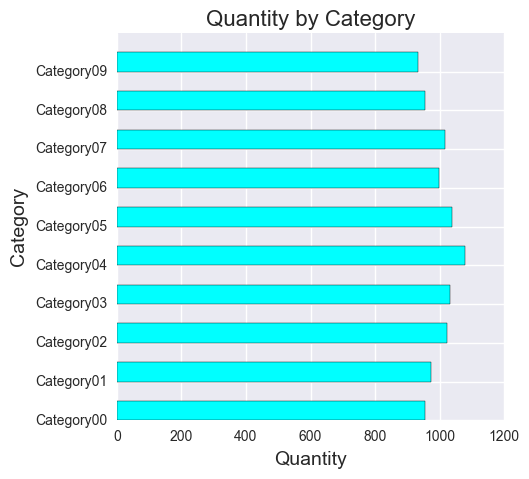

In [17]:
ind = range(n)
plt.figure(figsize=(5, 5))
height = 0.5
p1=plt.barh(ind,q,height, color="cyan")
plt.yticks(ind,cat_list,rotation='horizontal')
plt.xlabel('Quantity', fontsize = 14)
plt.ylabel('Category', fontsize = 14)
plt.title('Quantity by Category', fontsize = 16)
plt.show()

In [18]:
def qua_by_cat(data = dt):
    cat = dt["categorical"].tolist()
    cat_set = set(cat)
    cat_list = list(cat_set)
    cat_list.sort()
    n = len(cat_list)
    q = []
    for i in range(n):
        q.append(cat.count(cat_list[i]))
    ind = range(n)
    plt.figure(figsize=(5, 5))
    height = 0.5
    p1=plt.barh(ind,q,height, color="cyan")
    plt.yticks(ind,cat_list,rotation='horizontal')
    plt.xlabel('Quantity', fontsize = 14)
    plt.ylabel('Category', fontsize = 14)
    plt.title('Quantity by Category', fontsize = 16)
    plt.show()

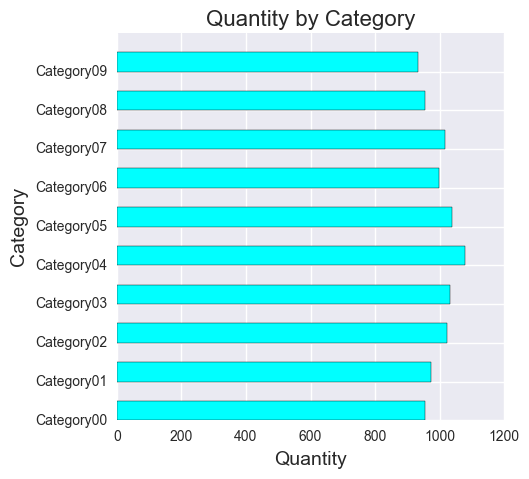

In [19]:
qua_by_cat()

In [66]:
    a = dt["quant1"].tolist()
    b = dt["quant2"].tolist()
    c = dt["quant3"].tolist()
    d = dt["categorical"].tolist()


In [67]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
colors = cm.rainbow(np.linspace(0, 1, len(cat_list)))
use_colors = {}
i = 0
for category in cat_list:
    use_colors[category] = colors[i]
    i+=1
use_colors

{'Category00': array([ 0.5,  0. ,  1. ,  1. ]),
 'Category01': array([ 0.28039216,  0.33815827,  0.98516223,  1.        ]),
 'Category02': array([ 0.06078431,  0.63647424,  0.94108925,  1.        ]),
 'Category03': array([ 0.16666667,  0.8660254 ,  0.8660254 ,  1.        ]),
 'Category04': array([ 0.38627451,  0.98408634,  0.76736268,  1.        ]),
 'Category05': array([ 0.61372549,  0.98408634,  0.64121331,  1.        ]),
 'Category06': array([ 0.83333333,  0.8660254 ,  0.5       ,  1.        ]),
 'Category07': array([ 1.        ,  0.63647424,  0.33815827,  1.        ]),
 'Category08': array([ 1.        ,  0.33815827,  0.17162568,  1.        ]),
 'Category09': array([  1.00000000e+00,   1.22464680e-16,   6.12323400e-17,
          1.00000000e+00])}

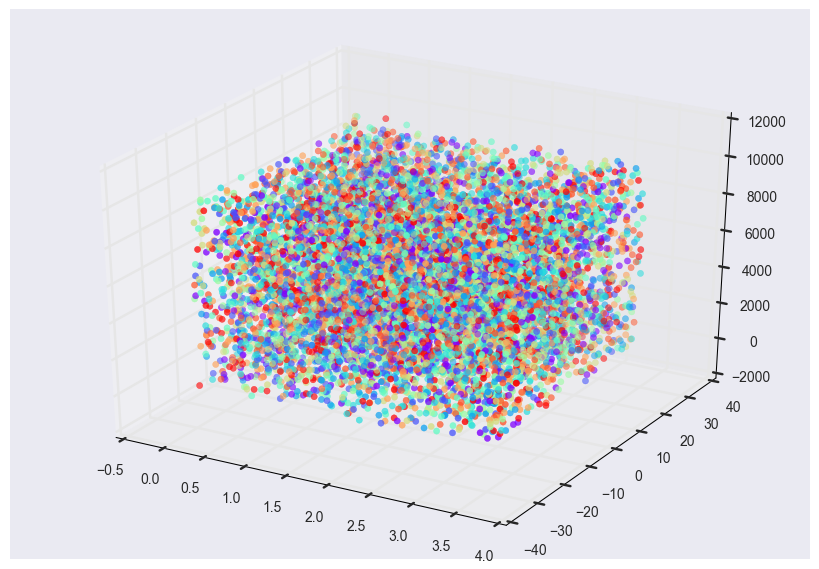

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = Axes3D(fig)
ax.scatter(a,b,c,color=[use_colors[x] for x in d])
plt.show()

In [ ]:
def q1q2q3_with_catColor(data = dt):
    a = dt["quant1"].tolist()
    b = dt["quant2"].tolist()
    c = dt["quant3"].tolist()
    d = dt["categorical"].tolist()
    colors = cm.rainbow(np.linspace(0, 1, len(cat_list)))
    use_colors = {}
    i = 0
    for category in cat_list:
        use_colors[category] = colors[i]
        i+=1
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = Axes3D(fig)
    ax.scatter(a,b,c,color=[use_colors[x] for x in d])
    plt.show()